<a href="https://colab.research.google.com/github/reddyalex/openpdn/blob/master/Week_3_Python_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install pyocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,577 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 131352 files and directories currently installed.)
Preparing to unpack .../tesseract

In [0]:
from PIL import Image
import sys
import pyocr
import pyocr.builders

In [0]:
tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("OCR tool is not found")
    sys.exit(1)

tool = tools[0]
print("OCR tool is '%s'" % (tool.get_name()))

OCR tool is 'Tesseract (sh)'


In [0]:
langs = tool.get_available_languages()
print("Available languages: %s" % ", ".join(langs))
lang = langs[1]
print("Will use lang '%s'" % (lang))

Available languages: osd, eng
Will use lang 'eng'


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


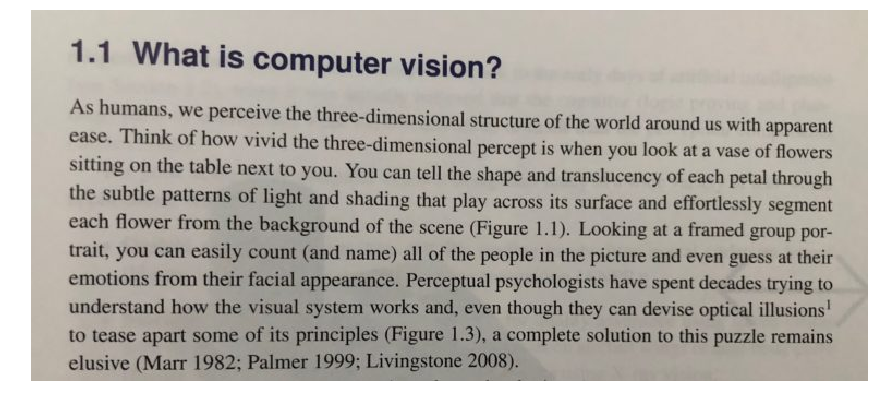

In [0]:
import cv2
import matplotlib.pyplot as plt
from pylab import rcParams
filename = "/content/gdrive/My Drive/ComputerVision/OCR Sample.jpg"
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.axis("off")
plt.imshow(img)

In [0]:
txt = tool.image_to_string(
    Image.open(filename),
    lang="eng",
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)
print(txt)

1.1 What is computer vision?

As humans, we perceive the three-dimensional Structure of the world around us with apparent
ease, Think of how vivid the three-dimensional percept is when you look at a vase of flowers
sitting on the table next to you. You can tell the shape and translucency of each petal through
the subtle patterns of light and shading that play across its surface and effortlessly segment
each flower from the background of the scene (Figure 1.1). Looking at a framed group por-
trait, you can easily count (and name) all of the people in the Picture and even guess at their
emotions from their facial appearance. Perceptual psychologists have spent decades trying to
understand how the visual system works and, even though they can devise optical illusions!
to tease apart some of its principles (Figure 1.3), a complete solution to this puzzle remains
elusive (Marr 1982; Palmer 1999; Livingstone 2008).
